In [1]:
# imports

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from hfn import *
import os

In [2]:
images = []
for filename in os.listdir("sample/bw/clean"):
    images.append(Image.open(f"sample/bw/clean/{filename}"))
hopfield = HopfieldNetwork(images[0].size)

for i in images:
    bits = np.array(i, dtype=int).flatten()
    states = bits * 2 - 1
    hopfield.train_network(states)

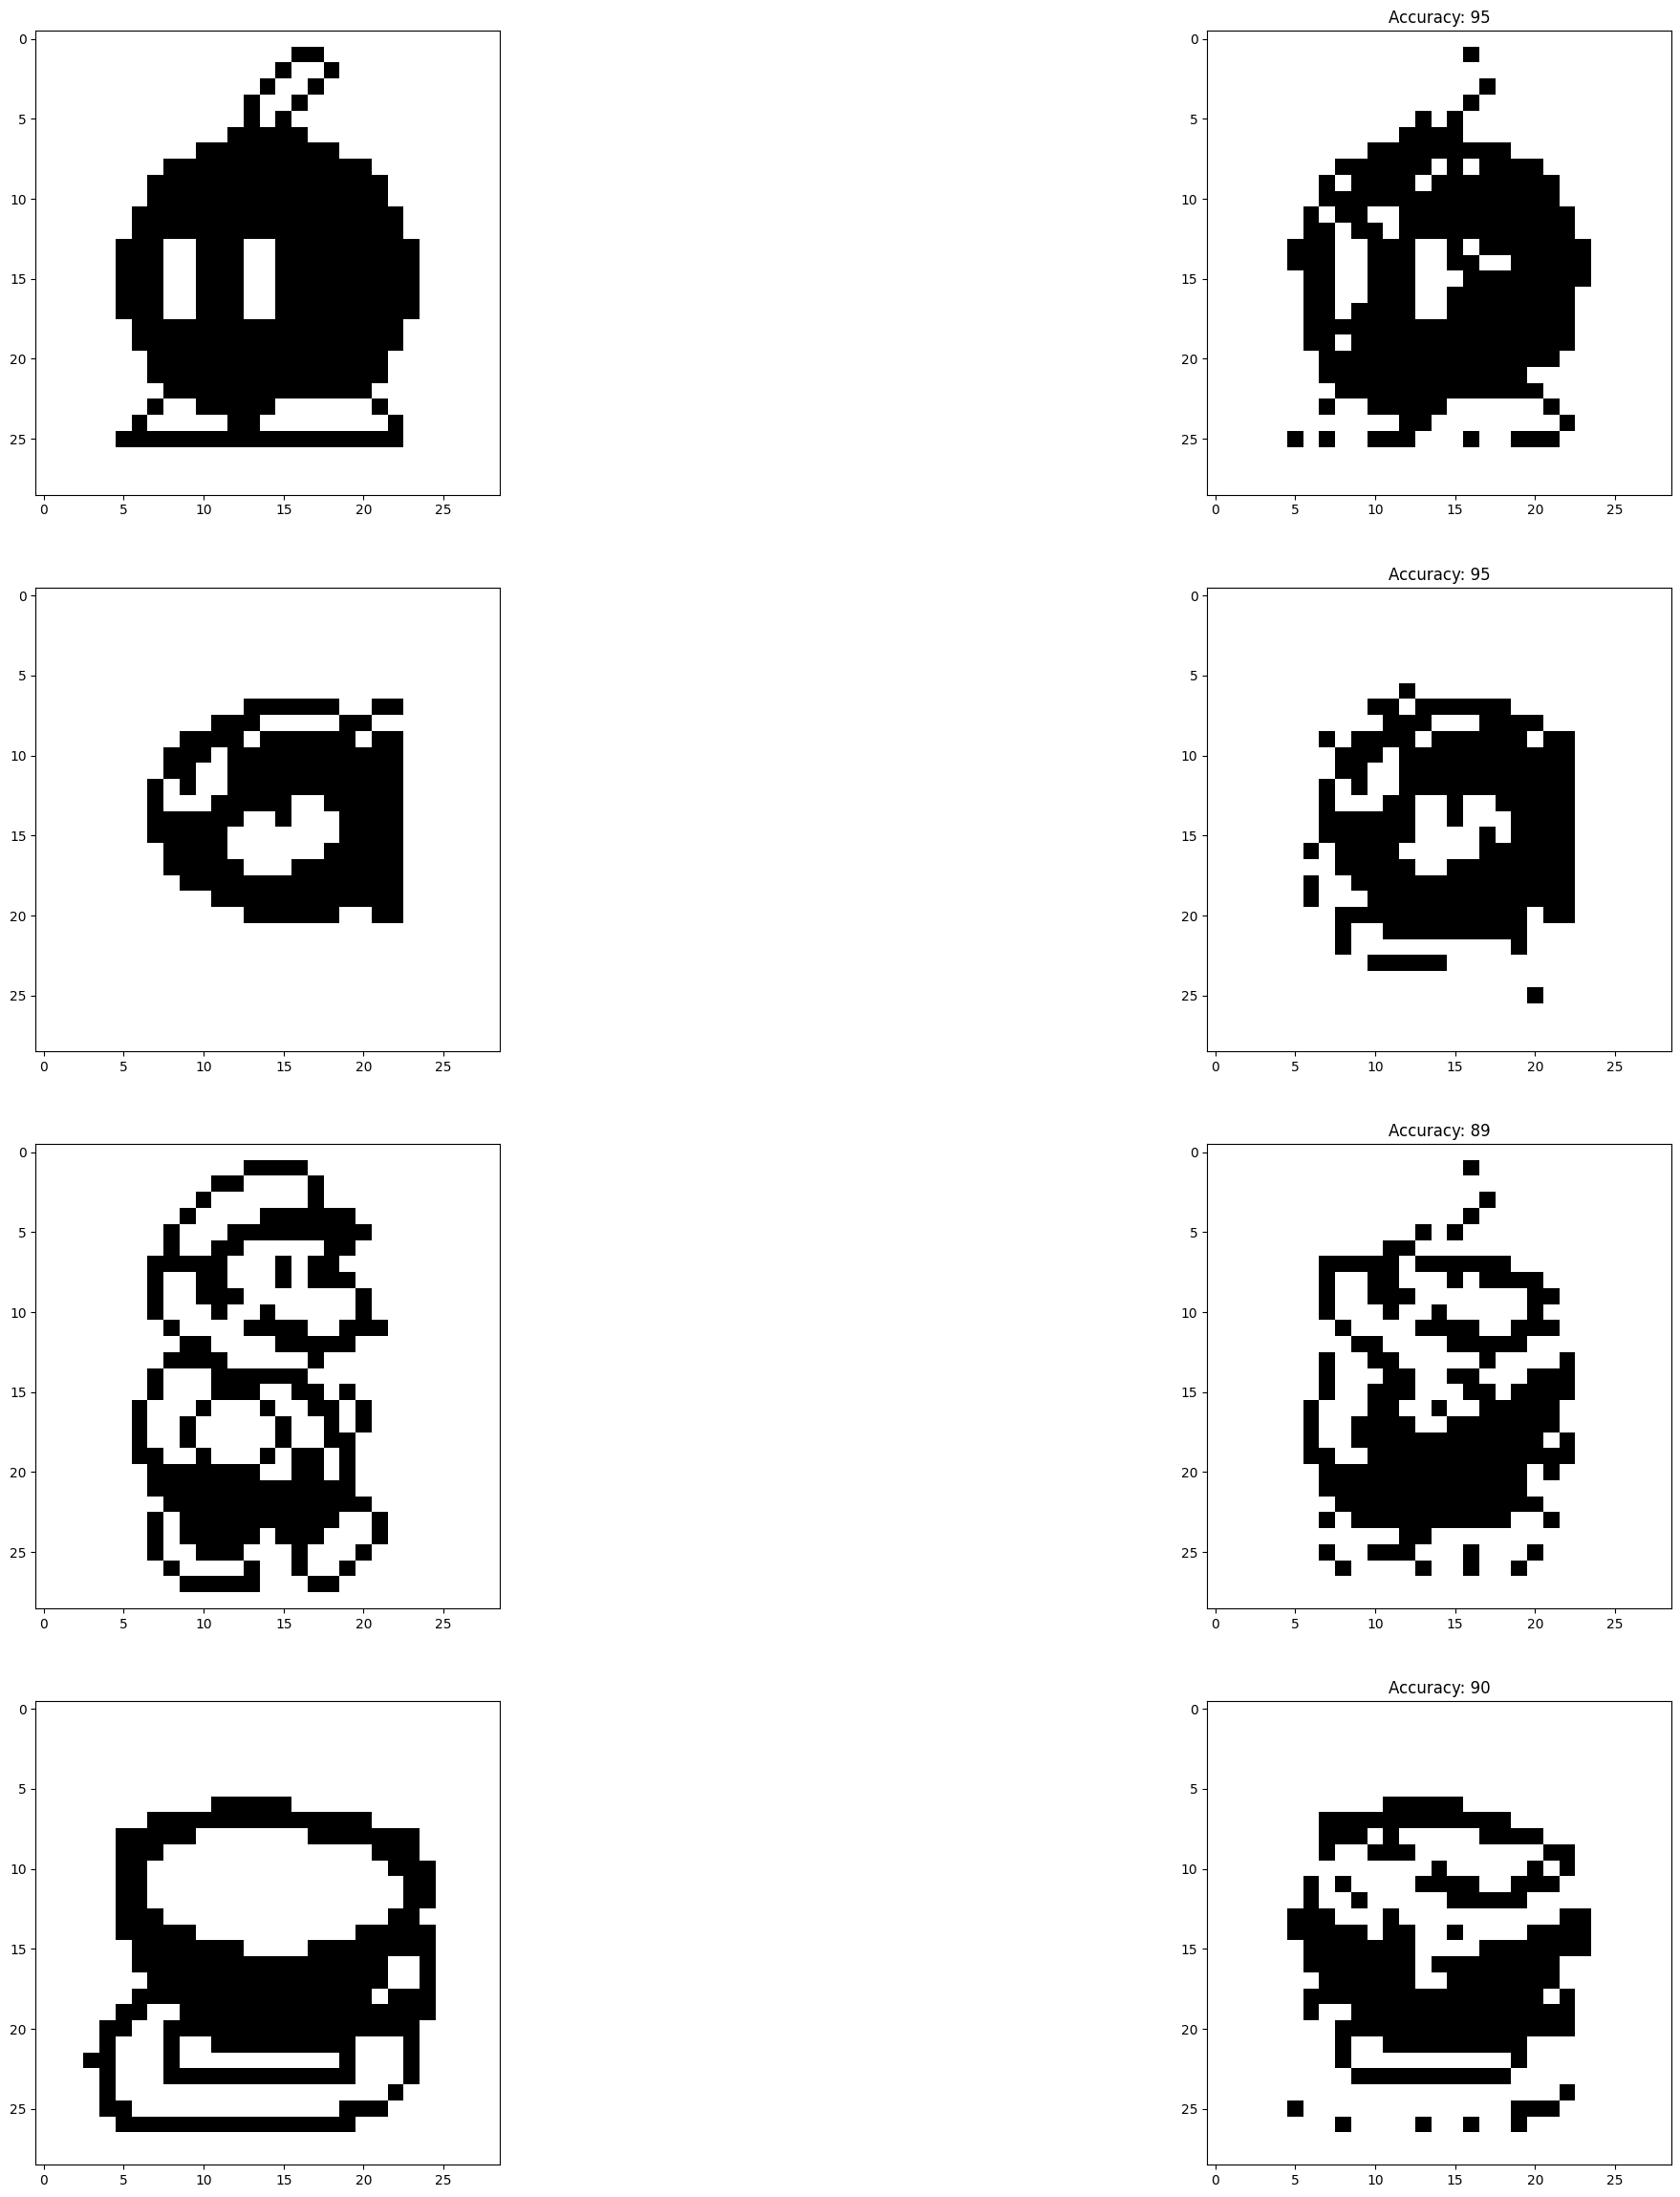

In [3]:
plt.figure(figsize=images[0].size)
for i in images:
    bits = np.array(i, dtype=int).flatten()
    states = bits * 2 - 1
    out = hopfield.update_async(states)
    outi = out.reshape(i.size[::-1])
    outi = outi // 2 * -255
    plt.subplot(4, 2, images.index(i) * 2 + 1)
    plt.imshow(i)

    
    plt.subplot(4, 2, images.index(i) * 2 + 2)
    accuracy = np.sum(states == out) * 100 // np.prod(i.size)
    plt.title(f"Accuracy: {accuracy}")
    plt.imshow(Image.fromarray(outi))

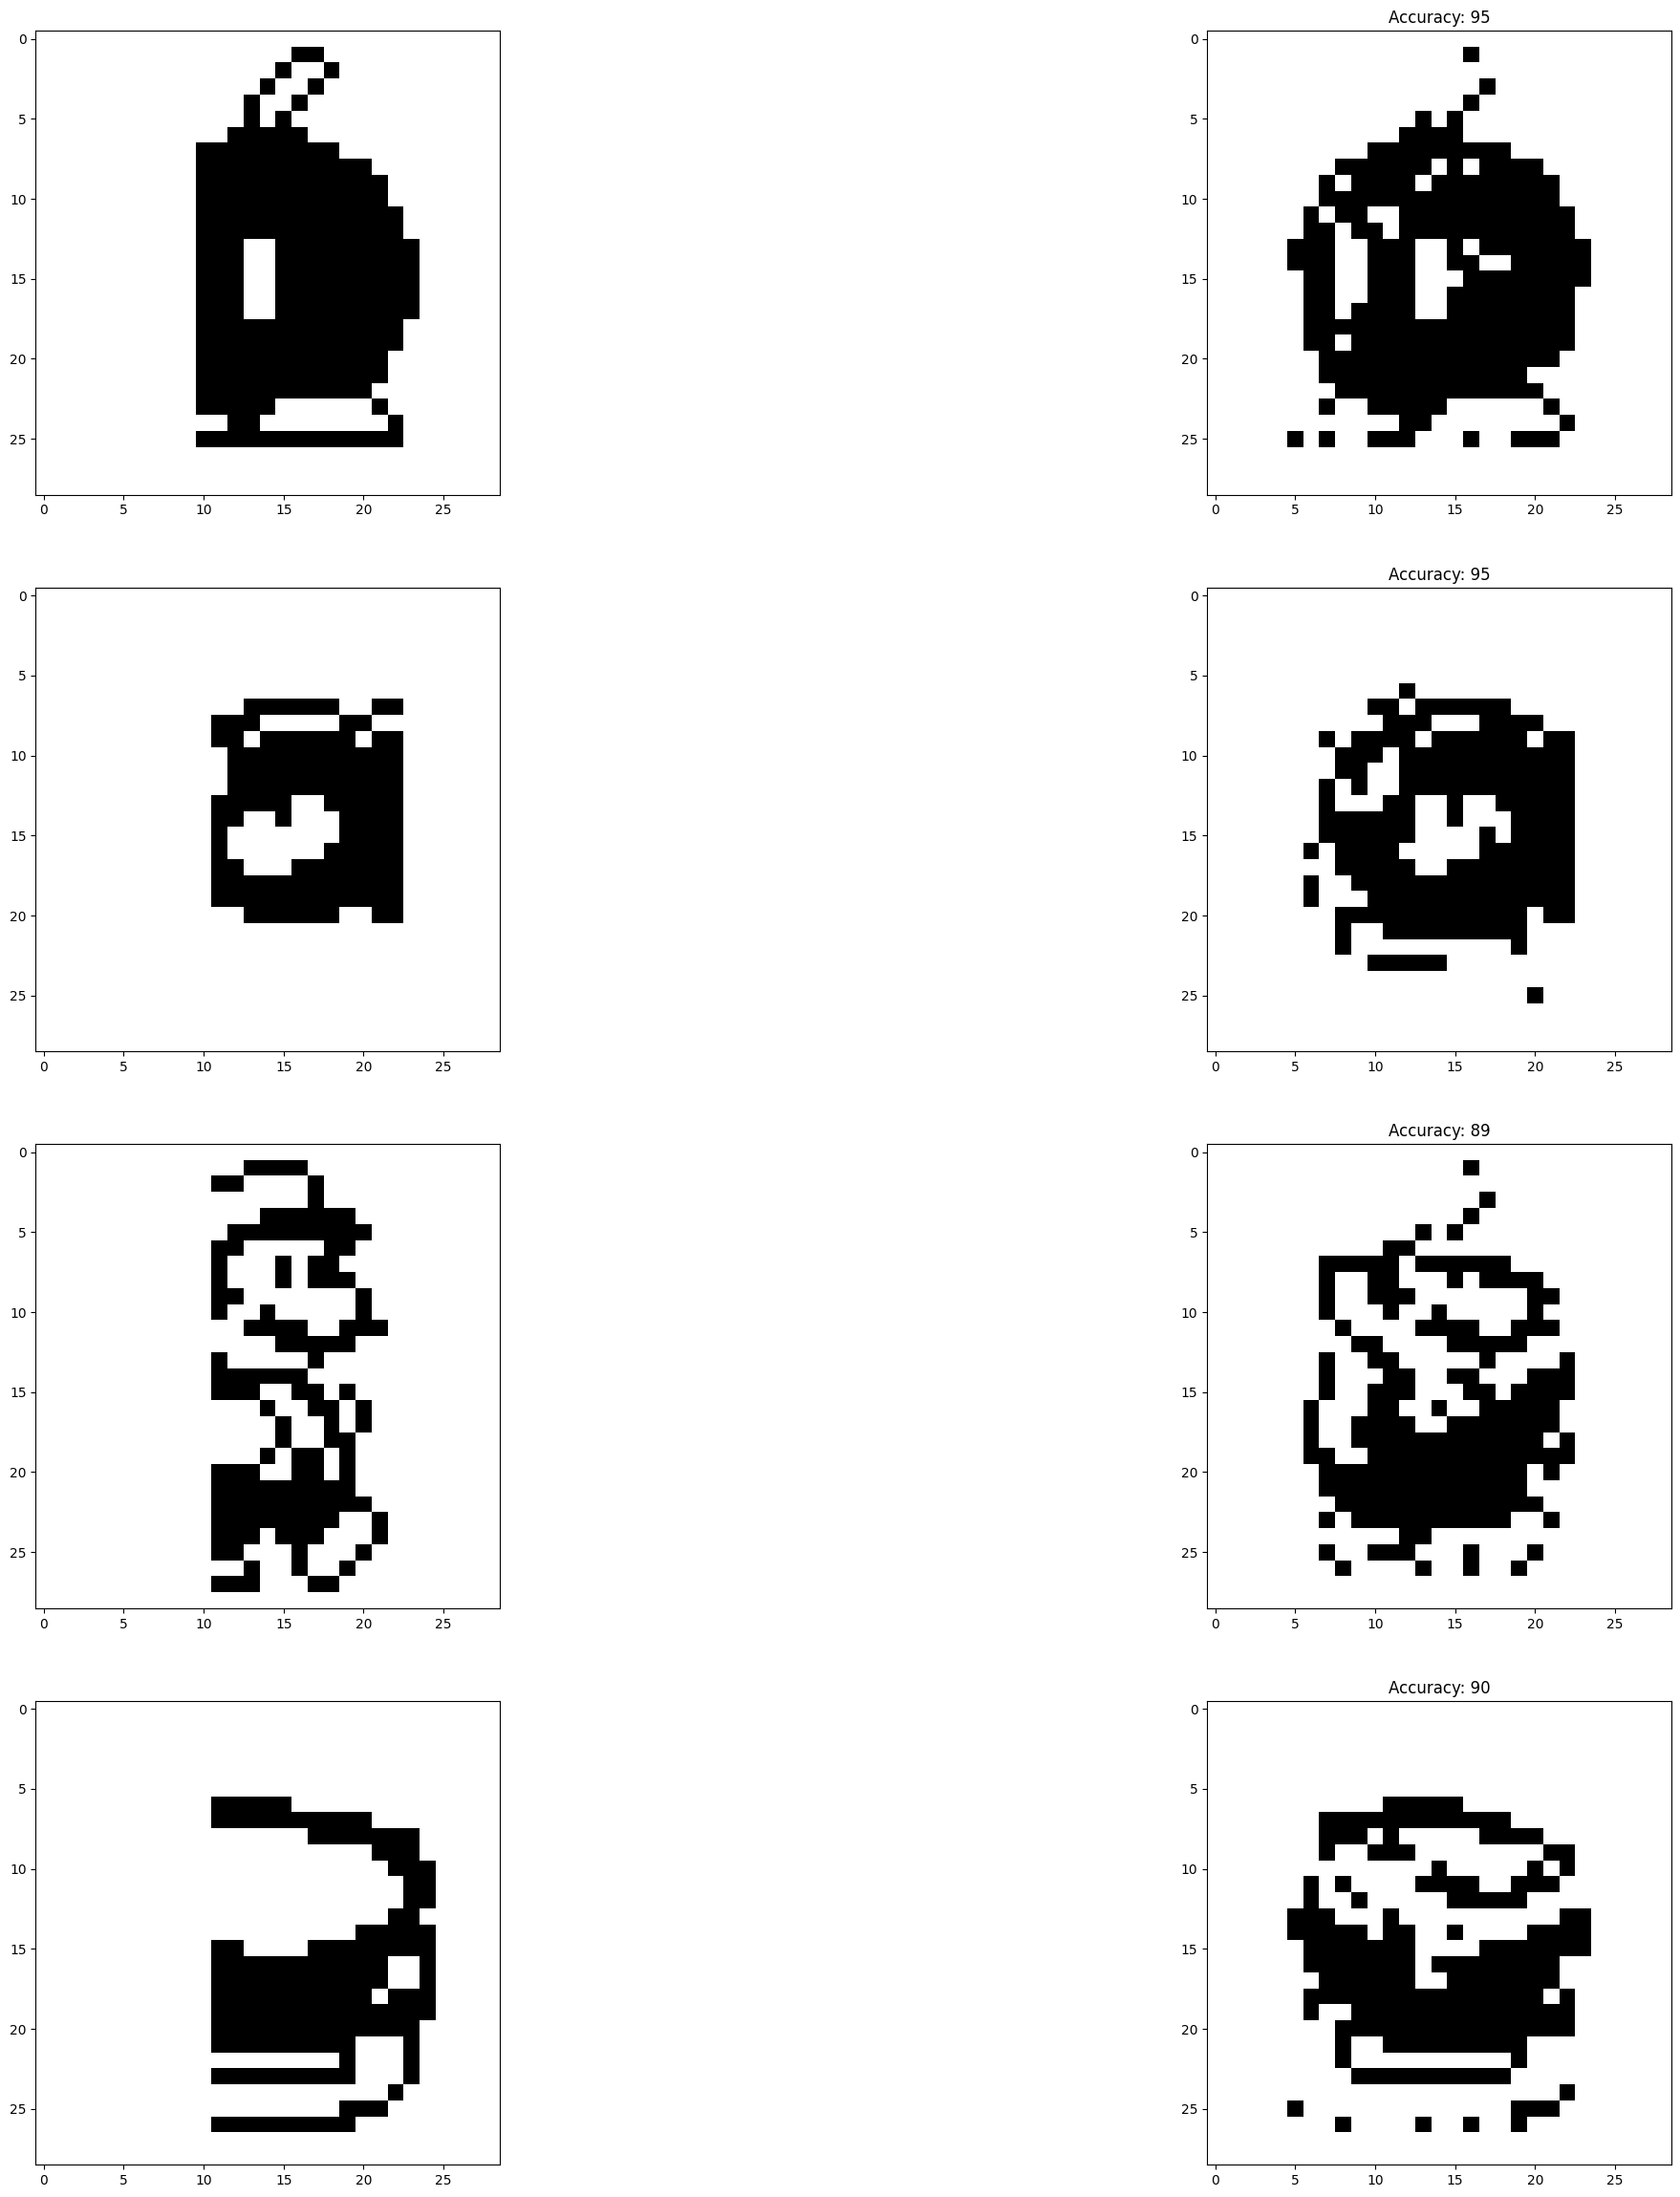

In [4]:
cimages = []
for filename in os.listdir("sample/corrupted"):
    cimages.append(Image.open(f"sample/corrupted/{filename}"))


plt.figure(figsize=cimages[0].size)
for i in cimages:
    bits = np.array(i, dtype=int).flatten()
    states = bits * 2 - 1

    
    bits2 = np.array(images[cimages.index(i)], dtype=int).flatten()
    states2 = bits2 * 2 - 1

    out = hopfield.update_async(states)
    outi = out.reshape(i.size[::-1])
    outi = outi // 2 * -255
    plt.subplot(4, 2, cimages.index(i) * 2 + 1)
    plt.imshow(i)

    plt.subplot(4, 2, cimages.index(i) * 2 + 2)
    accuracy = np.sum(states2 == out) * 100 // np.prod(i.size)
    plt.title(f"Accuracy: {accuracy}")
    plt.imshow(Image.fromarray(outi))